In [3]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
data = pd.read_csv("daily-website-visitors.csv", thousands = ",")

In [3]:
data

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,Sunday,1,9/14/2014,2146,1582,1430,152
1,2,Monday,2,9/15/2014,3621,2528,2297,231
2,3,Tuesday,3,9/16/2014,3698,2630,2352,278
3,4,Wednesday,4,9/17/2014,3667,2614,2327,287
4,5,Thursday,5,9/18/2014,3316,2366,2130,236
...,...,...,...,...,...,...,...,...
2162,2163,Saturday,7,8/15/2020,2221,1696,1373,323
2163,2164,Sunday,1,8/16/2020,2724,2037,1686,351
2164,2165,Monday,2,8/17/2020,3456,2638,2181,457
2165,2166,Tuesday,3,8/18/2020,3581,2683,2184,499


In [4]:
row = pd.DataFrame(data['Unique.Visits'])
row

,Unique.Visits
0,1582
1,2528
2,2630
3,2614
4,2366
...,...
2162,1696
2163,2037
2164,2638
2165,2683


In [2]:
plt.plot(row)
plt.show()

NameError: name 'row' is not defined

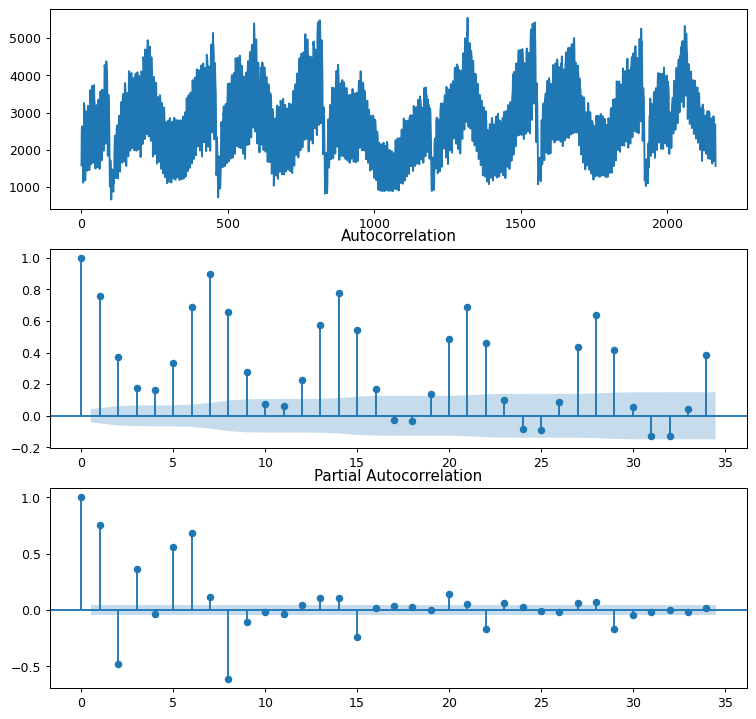

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(10,10), 'figure.dpi':90})
fig, axes = plt.subplots(3, 1)
axes[0].plot(row)
plot_acf(row, ax=axes[1]);
plot_pacf(row, ax=axes[2]);

In [10]:
row_diff = row.diff().iloc[1:]

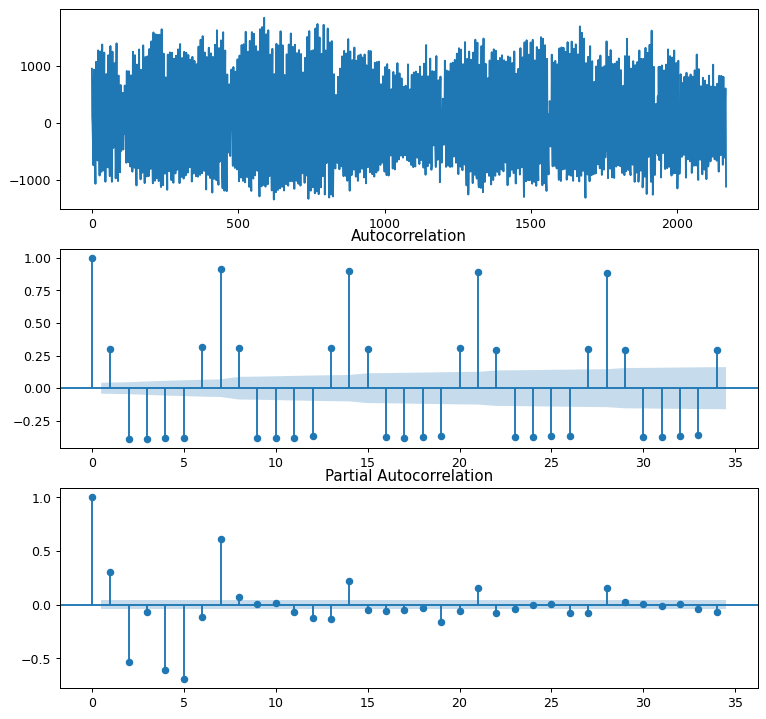

In [11]:
plt.rcParams.update({'figure.figsize':(10,10), 'figure.dpi':90})
fig, axes = plt.subplots(3, 1)
axes[0].plot(row_diff)
plot_acf(row_diff, ax=axes[1]);
plot_pacf(row_diff, ax=axes[2]);

In [12]:
row_diff2 = row_diff.diff().iloc[1:]

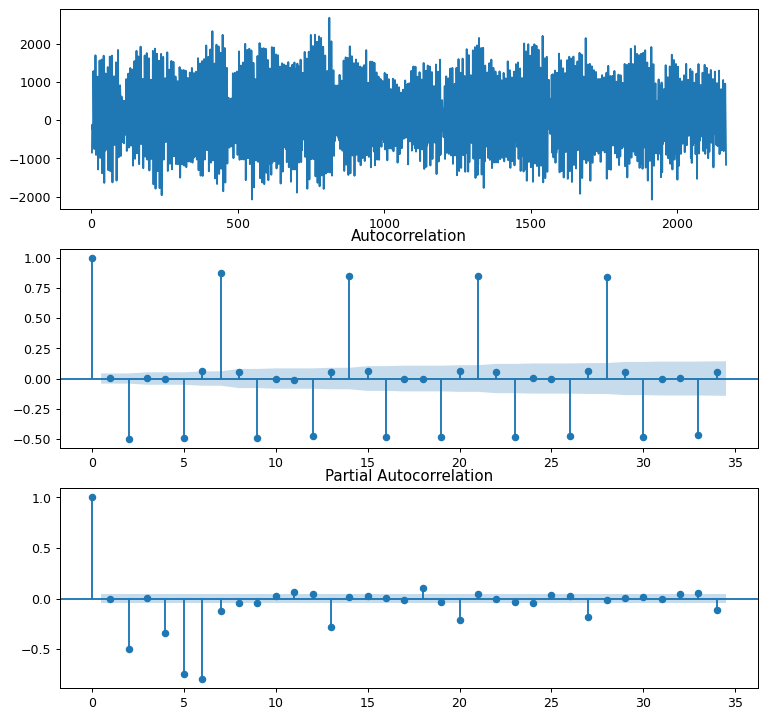

In [13]:
plt.rcParams.update({'figure.figsize':(10,10), 'figure.dpi':90})
fig, axes = plt.subplots(3, 1)
axes[0].plot(row_diff2)
plot_acf(row_diff2, ax=axes[1]);
plot_pacf(row_diff2, ax=axes[2]);

In [14]:
import math

time_steps = len(row)
training_time_steps = math.floor(time_steps * 0.8)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


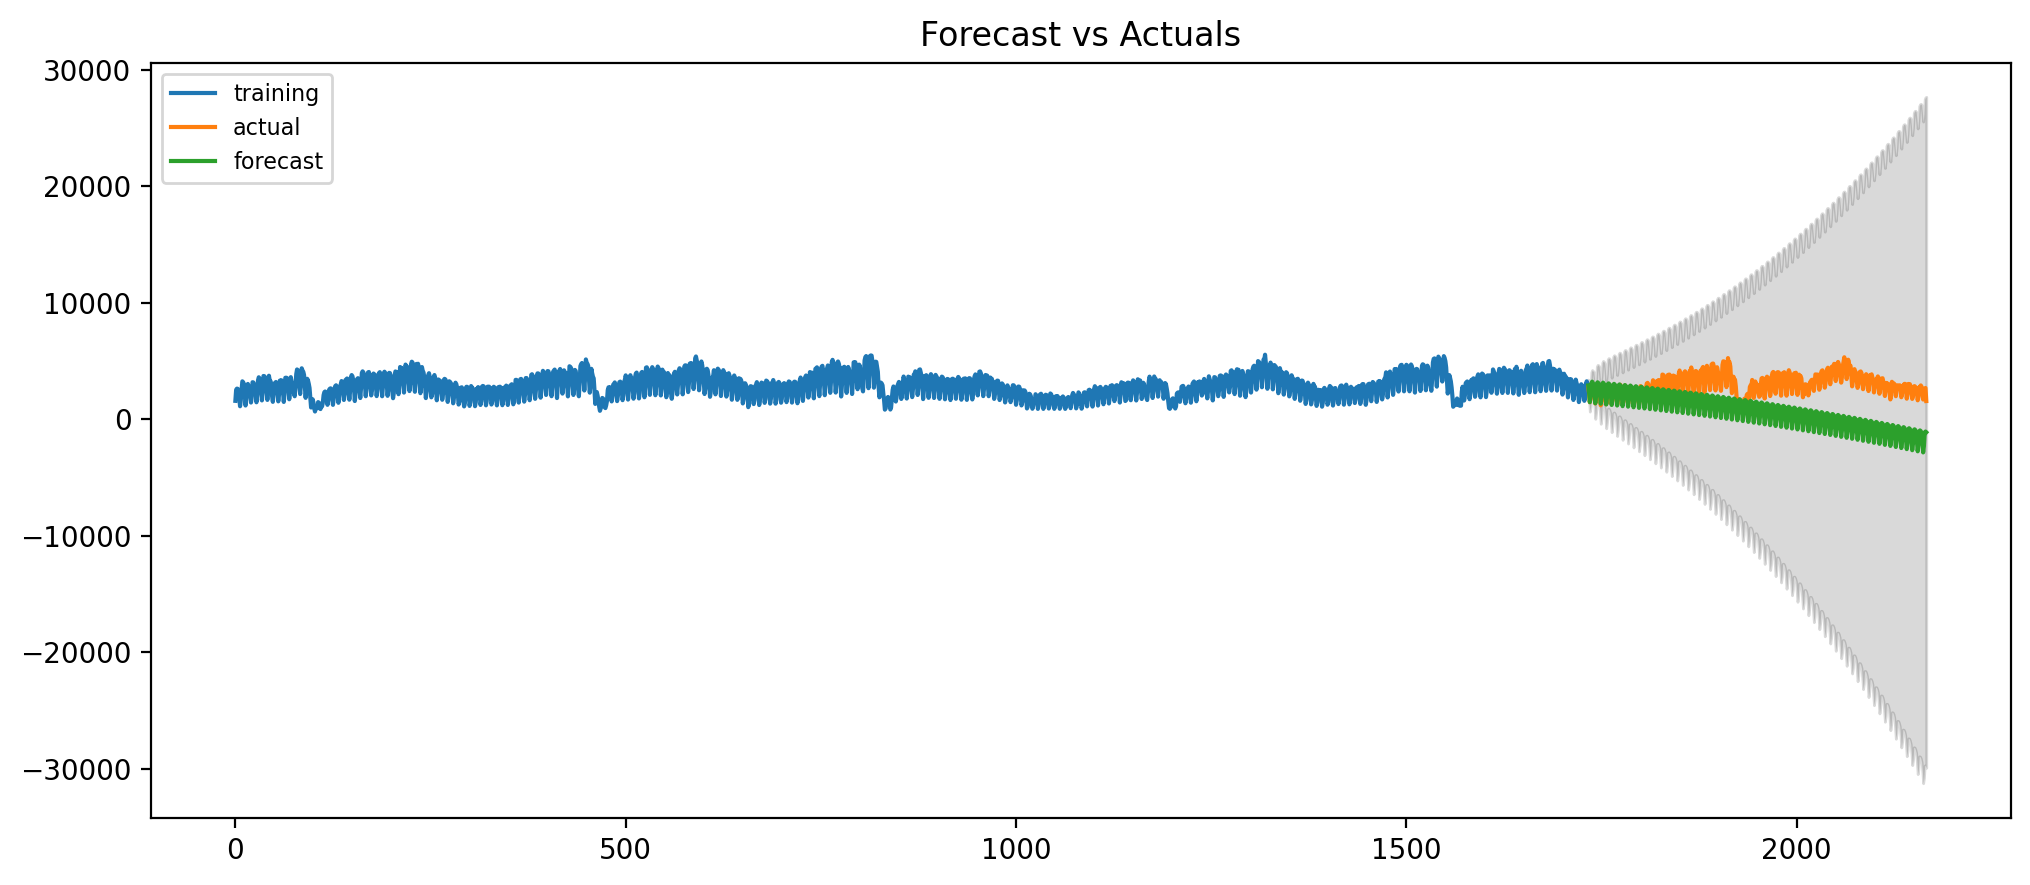

In [29]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(row[:training_time_steps], order=(2, 2, 6), seasonal_order=(1,1,1,7))  
fitted = model.fit()  

fc = fitted.get_forecast(len(row[training_time_steps:]))  
conf = fc.conf_int(alpha=0.05) # 95% confidence

fc_series = pd.Series(fc.predicted_mean, index=row[training_time_steps:].index)
lower_series = pd.Series(conf.iloc[:, 0], index=row[training_time_steps:].index)
upper_series = pd.Series(conf.iloc[:, 1], index=row[training_time_steps:].index)

# Plot
plt.figure(figsize=(12,5), dpi=200)
plt.plot(row[:training_time_steps], label='training')
plt.plot(row[training_time_steps:], label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()